 # 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [19]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

import cv2
from PIL import Image

%matplotlib inline

In [20]:
path = '/Users/naoki/diveintocode-ml/photos/' 
flist = os.listdir(path)

In [21]:
flist

['cat1.jpeg',
 '.DS_Store',
 'dog1.jpeg',
 'cat4.jpeg',
 'dog3.jpeg',
 'dog2.jpeg',
 'cat5.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'dog4.jpeg',
 'cat3.jpeg']

In [22]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [23]:
img_list

['/Users/naoki/diveintocode-ml/photos/cat1.jpeg',
 '/Users/naoki/diveintocode-ml/photos/dog1.jpeg',
 '/Users/naoki/diveintocode-ml/photos/cat4.jpeg',
 '/Users/naoki/diveintocode-ml/photos/dog3.jpeg',
 '/Users/naoki/diveintocode-ml/photos/dog2.jpeg',
 '/Users/naoki/diveintocode-ml/photos/cat5.jpeg',
 '/Users/naoki/diveintocode-ml/photos/cat2.jpeg',
 '/Users/naoki/diveintocode-ml/photos/dog5.jpeg',
 '/Users/naoki/diveintocode-ml/photos/dog4.jpeg',
 '/Users/naoki/diveintocode-ml/photos/cat3.jpeg']

(224, 224, 3)


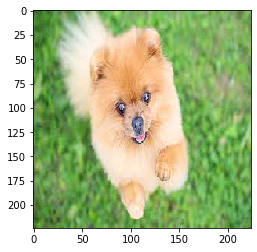

In [24]:
cat_img = Image.open(img_list[1])
        
# サイズを揃える
cat_img = cat_img.resize((224, 224))

cat_img = np.array(cat_img)

print(cat_img.shape)

plt.imshow(cat_img)

<class 'numpy.ndarray'>


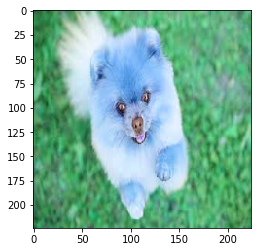

In [25]:
img = cv2.imread(img_list[1])

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

print(type(img))

plt.imshow(img)

In [26]:
image_lisat = []

In [27]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
print(cat_img_array)

[[[[0.45490196 0.35294118 0.2627451 ]
   [0.45490196 0.35294118 0.2627451 ]
   [0.45490196 0.35294118 0.2627451 ]
   ...
   [0.89803922 0.65882353 0.48627451]
   [0.90196078 0.6627451  0.49019608]
   [0.87058824 0.63921569 0.46666667]]

  [[0.45098039 0.34901961 0.25882353]
   [0.45098039 0.34901961 0.25882353]
   [0.45098039 0.34901961 0.25882353]
   ...
   [0.89803922 0.65882353 0.48627451]
   [0.90196078 0.6627451  0.49019608]
   [0.87058824 0.63921569 0.46666667]]

  [[0.44705882 0.34509804 0.25490196]
   [0.44705882 0.34509804 0.25490196]
   [0.44705882 0.34509804 0.25490196]
   ...
   [0.89803922 0.65882353 0.48627451]
   [0.90196078 0.6627451  0.49019608]
   [0.87058824 0.63921569 0.46666667]]

  ...

  [[0.78039216 0.56470588 0.35294118]
   [0.78039216 0.56470588 0.35294118]
   [0.78039216 0.56470588 0.35294118]
   ...
   [0.82745098 0.59607843 0.42352941]
   [0.82745098 0.59607843 0.42352941]
   [0.82745098 0.59607843 0.43137255]]

  [[0.78039216 0.56470588 0.35294118]
   [0.7

In [28]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [29]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


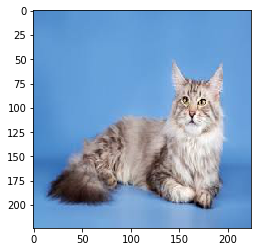

In [30]:
plt.imshow(cat_img_array[1])

In [31]:
def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

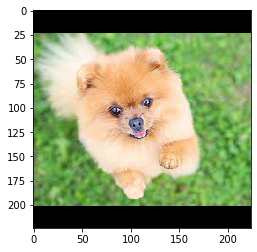

In [32]:
img = Image.open(img_list[1])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

In [33]:
import cv2

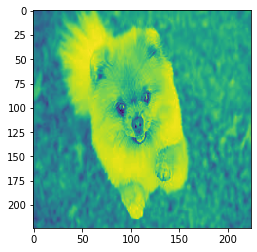

In [34]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[1], 0)

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

plt.imshow(img)

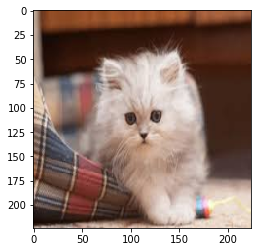

In [35]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[6])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGB

plt.imshow(img_rgb)

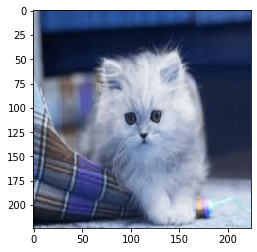

In [36]:
plt.imshow(img)

In [37]:
print(img_list)

['/Users/naoki/diveintocode-ml/photos/cat1.jpeg', '/Users/naoki/diveintocode-ml/photos/dog1.jpeg', '/Users/naoki/diveintocode-ml/photos/cat4.jpeg', '/Users/naoki/diveintocode-ml/photos/dog3.jpeg', '/Users/naoki/diveintocode-ml/photos/dog2.jpeg', '/Users/naoki/diveintocode-ml/photos/cat5.jpeg', '/Users/naoki/diveintocode-ml/photos/cat2.jpeg', '/Users/naoki/diveintocode-ml/photos/dog5.jpeg', '/Users/naoki/diveintocode-ml/photos/dog4.jpeg', '/Users/naoki/diveintocode-ml/photos/cat3.jpeg']


 ## 分類

In [38]:
# np.resizeはだめ、ぜったい

d_img_array = np.empty((0,224,224,3))


for img in img_list:

    d_img = Image.open(img)

    # サイズを揃える
    d_img = d_img.resize((224, 224))

    # PIL.Image.Imageからnumpy配列へ
    d_img = np.array(d_img)

    # 正規化
    d_img = d_img / 255.0

    # axisの追加
    d_img = d_img.reshape((1,224,224,3))

    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

print(d_img_array.shape)
X = d_img_array

(10, 224, 224, 3)


In [39]:
path2 = "/Users/naoki/diveintocode-ml/photo_test"
img_list2 = glob.glob(path2 + '/*' + ".jpeg")

In [40]:
# np.resizeはだめ、ぜったい

t_img_array = np.empty((0,224,224,3))


for img in img_list2:

    t_img = Image.open(img)

    # サイズを揃える
    t_img = t_img.resize((224, 224))

    # PIL.Image.Imageからnumpy配列へ
    t_img = np.array(t_img)

    # 正規化
    t_img = t_img / 255.0

    # axisの追加
    t_img = t_img.reshape((1,224,224,3))

    t_img_array = np.concatenate([t_img_array, t_img], axis = 0)

print(t_img_array.shape)
X_test = t_img_array

(10, 224, 224, 3)


In [41]:
Y = []
for i in  img_list:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y

[0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

In [42]:
Y_test = []
for i in  img_list2:
    if re.search('dog', i):
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_test

[1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

In [46]:
model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(200,  activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(200, activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))


# オプティマイザにAdamを使用
opt = optimizers.Adam(lr=0.001)
# モデルをコンパイル
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# 学習を実行。10%はテストに使用。
# model.fit(image_list, Y, nb_epoch=100, batch_size=10, validation_split=0.1)
model.fit(X, Y, nb_epoch=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/20
10/10 [==============================] - 0s 47ms/step - loss: 0.6621 - accuracy: 0.8000
Epoch 2/20
10/10 [==============================] - 0s 22ms/step - loss: 1.9686 - accuracy: 0.3000
Epoch 3/20
10/10 [==============================] - 0s 22ms/step - loss: 3.5860 - accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 0s 22ms/step - loss: 2.4545 - accuracy: 0.6000
Epoch 5/20
10/10 [==============================] - 0s 21ms/step - loss: 2.9770 - accuracy: 0.4000
Epoch 6/20
10/10 [==============================] - 0s 21ms/step - loss: 0.2818 - accuracy: 0.9000
Epoch 7/20
10/10 [==============================] - 0s 20ms/step - loss: 3.2299 - accuracy: 0.3000
Epoch 8/20
10/10 [==============================] - 0s 20ms/step - loss: 1.5118 - accuracy: 0.8000
Epoch 9/20
10/10 [==============================] - 0s 22ms/step - loss: 0.5734 - accuracy: 0.8000
Epoch 10/20
10/10 [==============================] - 0s 21ms/step - loss: 0.0801 - accuracy: 1.0000
Epoch 11

In [47]:
Y_pred = np.round(model.predict(X_test))

In [48]:
Y_test

[1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[2, 3],
       [1, 4]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.6

 # 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

In [51]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [52]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
 
# 入力ディレクトリを作成
input_dir = "photos_dog"
files = glob.glob(input_dir + '/*.jpeg')
 
# 出力ディレクトリを作成
output_dir = "photo_out_mix"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(51):
        batch = g.next()

In [53]:
# 入力ディレクトリを作成
input_dir = "photos_cat"
files = glob.glob(input_dir + '/*.jpeg')
 
# 出力ディレクトリを作成
output_dir = "photo_out_mix"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(51):
        batch = g.next()

In [54]:
path3 = "/Users/naoki/diveintocode-ml/photo_out_mix"

In [55]:
img_list_mix = glob.glob(path3 + '/*' + ".jpg")
img_list_mix

['/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_224.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/cat_0_4036.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_4359.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_2728.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_4167.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/cat_0_4368.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/cat_0_4432.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/cat_0_4156.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/cat_0_4802.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_9046.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/cat_0_2526.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_2846.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_345.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_3755.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/dog_0_5330.jpg',
 '/Users/naoki/diveintocode-ml/photo_out_mix/cat_0_2917.jpg',
 '/Users/n

In [56]:
d_img_array = np.empty((0,224,224,3))


for img in img_list_mix:

    d_img = Image.open(img)

    # サイズを揃える
    d_img = d_img.resize((224, 224))

    # PIL.Image.Imageからnumpy配列へ
    d_img = np.array(d_img)

    # 正規化
    d_img = d_img / 255.0

    # axisの追加
    d_img = d_img.reshape((1,224,224,3))

    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

print(d_img_array.shape)
X = d_img_array

(501, 224, 224, 3)


In [57]:
Y = []
for i in  img_list_mix:
    if re.search('dog', i):
        Y.append(1)
    else:
        Y.append(0)
Y

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,


In [58]:

model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(3,3))

model.add(Flatten())

model.add(Dense(200,  activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(200, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))


# オプティマイザにAdamを使用
opt = optimizers.Adam(lr=0.001)
# モデルをコンパイル
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# 学習を実行。10%はテストに使用。
# model.fit(image_list, Y, nb_epoch=100, batch_size=10, validation_split=0.1)
model.fit(X, Y, nb_epoch=15,  batch_size=50, validation_split=0.1)

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 450 samples, validate on 51 samples
Epoch 1/15
450/450 [==============================] - 4s 9ms/step - loss: 0.7245 - accuracy: 0.5333 - val_loss: 0.6303 - val_accuracy: 0.7255
Epoch 2/15
450/450 [==============================] - 3s 8ms/step - loss: 0.5447 - accuracy: 0.7378 - val_loss: 0.4745 - val_accuracy: 0.6275
Epoch 3/15
450/450 [==============================] - 4s 8ms/step - loss: 0.3403 - accuracy: 0.8444 - val_loss: 0.1679 - val_accuracy: 1.0000
Epoch 4/15
450/450 [==============================] - 3s 7ms/step - loss: 0.1645 - accuracy: 0.9622 - val_loss: 0.0903 - val_accuracy: 1.0000
Epoch 5/15
450/450 [==============================] - 3s 7ms/step - loss: 0.0645 - accuracy: 0.9867 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 6/15
450/450 [==============================] - 4s 8ms/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 7/15
450/450 [==============================] - 3s 8ms/step - loss: 0.0387 - accuracy: 0.9822 - v

In [59]:
Y_pred = np.round(model.predict(X_test))

In [60]:
confusion_matrix(Y_test, Y_pred)

array([[3, 2],
       [2, 3]])

In [61]:
accuracy_score(Y_test, Y_pred)

0.6

In [62]:
path4 = "/Users/naoki/diveintocode-ml/test/"

In [63]:
img_list_test = glob.glob(path4 + '/*' + ".jpg")
img_list_test

['/Users/naoki/diveintocode-ml/test/cat_1.jpg',
 '/Users/naoki/diveintocode-ml/test/cat_2.jpg',
 '/Users/naoki/diveintocode-ml/test/cat_3.jpg',
 '/Users/naoki/diveintocode-ml/test/cat_6.jpg',
 '/Users/naoki/diveintocode-ml/test/dog_6.jpg',
 '/Users/naoki/diveintocode-ml/test/dog_1.jpg',
 '/Users/naoki/diveintocode-ml/test/dog_3.jpg']

In [64]:
t_img_array = np.empty((0,224,224,3))


for img in img_list_test:

    t_img = Image.open(img)
#     img = cv2.imread(img_list[1], 0)
    # サイズを揃える
    t_img = t_img.resize((224, 224))

    # PIL.Image.Imageからnumpy配列へ
    t_img = np.array(t_img)
    if  t_img.shape == (224, 224, 4):
        t_img = t_img[:,:,:3]
    
    print(t_img.shape)
    # 正規化
    t_img = t_img / 255.0

    # axisの追加
    t_img = t_img.reshape((1,224,224,3))

    t_img_array = np.concatenate([t_img_array, t_img], axis = 0)

print(t_img_array.shape)
X_test = t_img_array

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(7, 224, 224, 3)


In [65]:
for i in  img_list_test:
    print(i)

/Users/naoki/diveintocode-ml/test/cat_1.jpg
/Users/naoki/diveintocode-ml/test/cat_2.jpg
/Users/naoki/diveintocode-ml/test/cat_3.jpg
/Users/naoki/diveintocode-ml/test/cat_6.jpg
/Users/naoki/diveintocode-ml/test/dog_6.jpg
/Users/naoki/diveintocode-ml/test/dog_1.jpg
/Users/naoki/diveintocode-ml/test/dog_3.jpg


In [66]:
Y_test = []
for i in  img_list_test:
    if re.search('dog', i):
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_test

[0, 0, 0, 0, 1, 1, 1]

In [67]:
Y_pred = np.round(model.predict(X_test))
Y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [68]:
confusion_matrix(Y_test, Y_pred)

array([[4, 0],
       [3, 0]])

In [69]:
accuracy_score(Y_test, Y_pred)

0.5714285714285714

 # 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

In [2]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(10,40))
    plt.imshow(img)
    return img

In [5]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [6]:
image = download_image('/Users/naoki/diveintocode-ml/photo_test/cat_1.jpeg')
image = np.array(image)

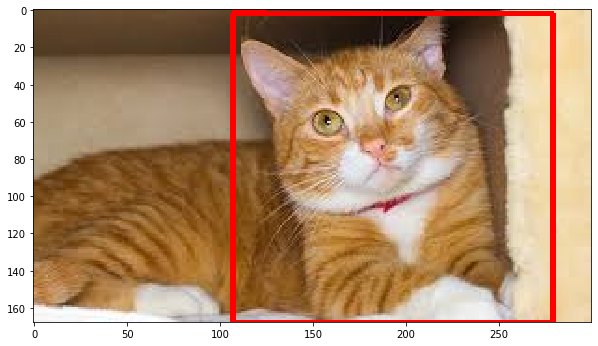

In [7]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/cat_1.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[107,2,279,168]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/cat1_img.jpeg")

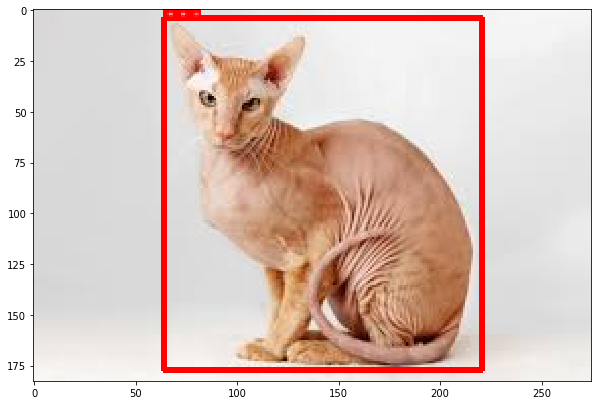

In [8]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/cat_2.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[64,4,221,177]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/cat2_img.jpeg")

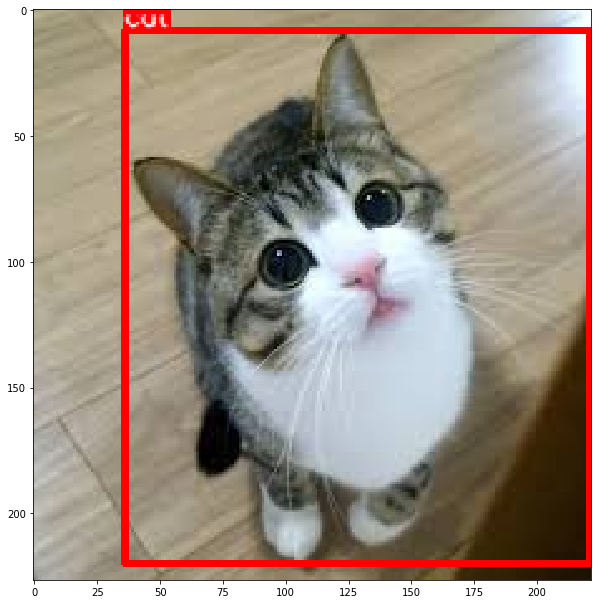

In [9]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/cat_3.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[36,8,221,220]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/cat3_img.jpeg")

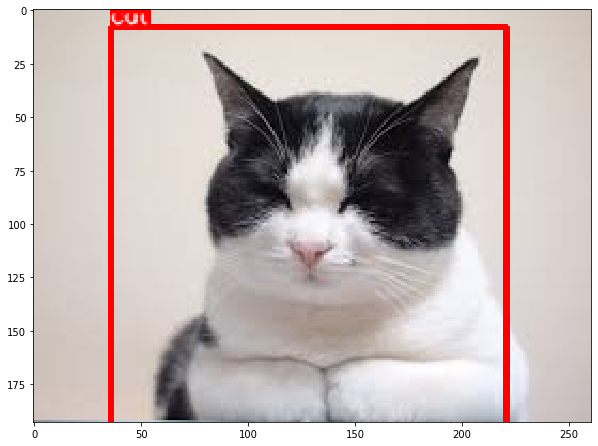

In [10]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/cat_4.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[36,8,221,220]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/cat4_img.jpeg")

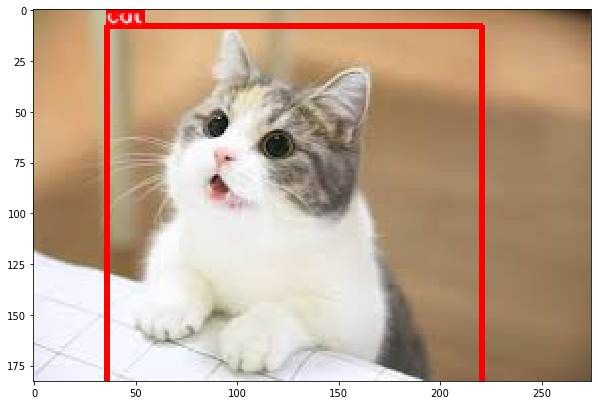

In [11]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/cat_5.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[36,8,221,220]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/cat5_img.jpeg")

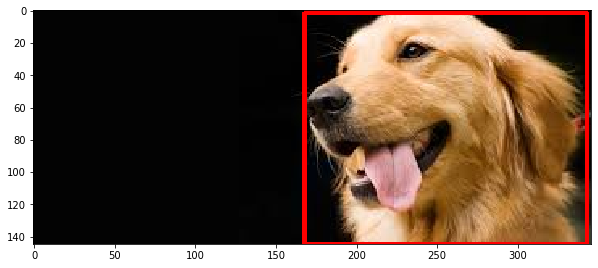

In [12]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/dog_1.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[168,1,343,145]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/dog1_img.jpeg")

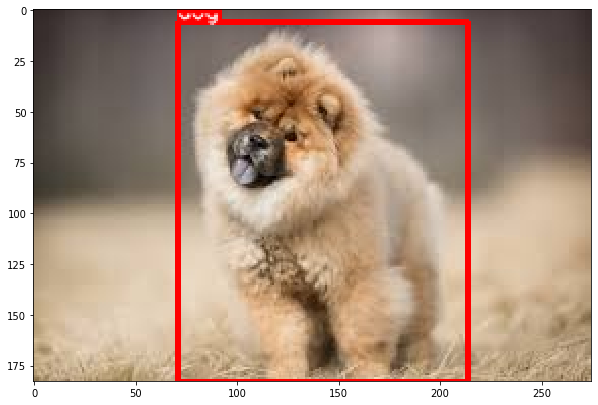

In [13]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/dog_2.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[71,6,214,183]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/dog2_img.jpeg")

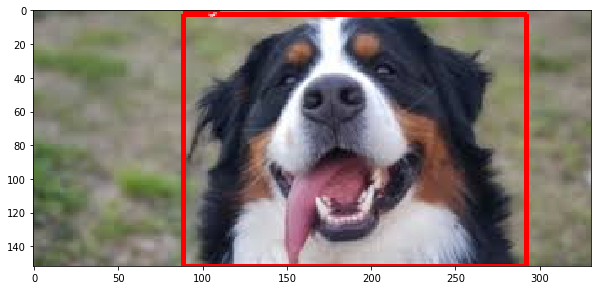

In [14]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/dog_3.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[89,3,292,152]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/dog3_img.jpeg")

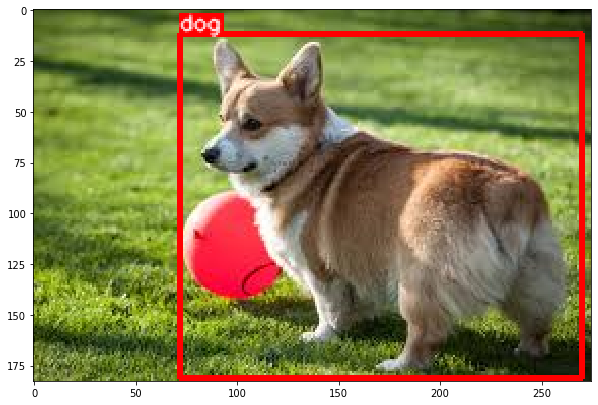

In [15]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/dog_4.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[72,12,270,181]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/dog4_img.jpeg")

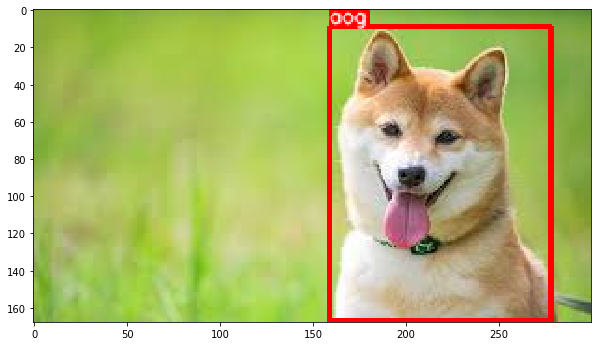

In [16]:
image = download_image('/Users/naoki/diveintocode-ml/photos2/dog_5.jpeg')
image = np.array(image)


annotations = {'image': image, 'bboxes': [[159,9,278,167,]], 'category_id': [18]}
category_id_to_name = {17: 'cat', 18: 'dog'}
img = visualize(annotations, category_id_to_name)

pillow = Image.fromarray(np.uint8(img))
pillow.save("/Users/naoki/diveintocode-ml/image_list/dog5_img.jpeg")

In [17]:
with open("/Users/naoki/diveintocode-ml/photo_test/test.txt") as f:
  s = f.read()
  print(s)

/Users/naoki/diveintocode-ml/photo_test/cat_1.jpeg 107,2,279,168,0
/Users/naoki/diveintocode-ml/photo_test/cat_2.jpeg 64,4,221,177,0
/Users/naoki/diveintocode-ml/photo_test/cat_3.jpeg 36,8,221,220,0
/Users/naoki/diveintocode-ml/photo_test/cat_4.jpeg 59,14,216,192,0
/Users/naoki/diveintocode-ml/photo_test/cat_5.jpeg 36,8,201,183,0
/Users/naoki/diveintocode-ml/photo_test/dog_1.jpeg 168,1,343,145,1
/Users/naoki/diveintocode-ml/photo_test/dog_2.jpeg 71,6,214,183,1
/Users/naoki/diveintocode-ml/photo_test/dog_3.jpeg 89,3,292,152,1
/Users/naoki/diveintocode-ml/photo_test/dog_4.jpeg 72,12,270,181,1
/Users/naoki/diveintocode-ml/photo_test/dog_5.jpeg 159,9,278,167,1


# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [18]:
# 入力ディレクトリを作成
input_dir = "/Users/naoki/diveintocode-ml/photos2"
files = glob.glob(input_dir + '/*.jpeg')
 
# 出力ディレクトリを作成
output_dir = "/Users/naoki/diveintocode-ml/image_ag"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
 
 
for i, file in enumerate(files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # ImageDataGeneratorの生成
    datagen = ImageDataGenerator(
            rescale=None,
            rotation_range=45,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.3,
            zoom_range=0.3,
            channel_shift_range=5.,
            horizontal_flip=True,
            )
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(51):
        batch = g.next()

Using TensorFlow backend.
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/sit